In [1]:
import pandas as pd

df_train = pd.read_csv('datas/dr_train_10pcent.csv')
df_test = pd.read_csv('datas/dr_test_10pcent.csv')

#df_train = df_train.sample(frac=0.1, random_state=42)
#df_test = df_test.sample(frac=0.1, random_state=42)

df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4196,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4197,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4198,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
import matplotlib.pyplot as plt

def letras(data, labels):
    fig = plt.figure(figsize = (10, 3))

    rows, cols = 2, 8

    import random

    for i in range(1, rows*cols+1):
        random_idx = random.randint(0, len(data)-1)

        image = data[random_idx].reshape(28,28)

        label = labels[random_idx]

        ax = fig.add_subplot(rows, cols, i) # Adiciona o subplot
        ax.imshow(image.squeeze(), cmap = "gray") # cmap = "gray" para gerar a imagem em escala de cinza
        ax.set_title(label)
        ax.axis(False) # Desliga os eixos

    plt.tight_layout() # Ajusta o layout para evitar sobreposição
    plt.show()

In [3]:
import numpy as np

train_data = df_train.drop(columns=['label'], axis=1).to_numpy()

labels = df_train['label'].to_numpy()

labels_unique = np.unique(df_train['label'].to_numpy())

print(f'Dados de treino:\n\n{train_data}\n\nNúmeros:\n\n{labels}')

Dados de treino:

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Números:

[8 1 9 ... 7 7 5]


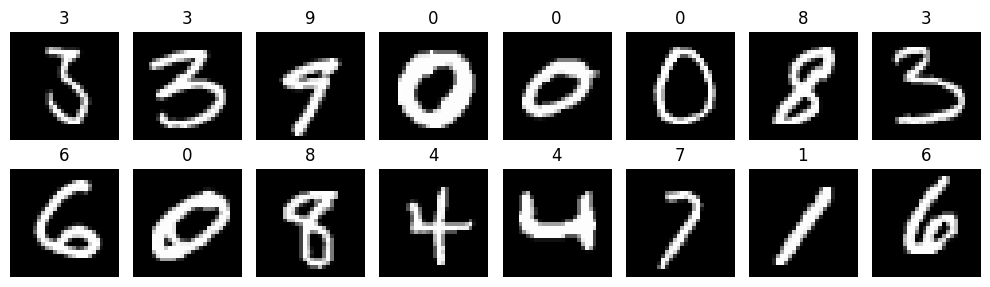

In [4]:
letras(train_data, labels)

In [5]:
from sklearn.model_selection import train_test_split

# Dados de treino
X_train, X_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.2, random_state=42)

import tensorflow as tf

# Remodelando os dados de entrada
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [6]:
import tensorflow as tf

from tensorflow.keras.layers import Input

# Construindo o modelo
model = tf.keras.models.Sequential([

    # Camada de entrada especificando a forma da imagem
    Input(shape=(28, 28, 1)),
    
    # Camada de convolução com 32 filtros de tamanho 3x3 e ativação ReLU
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),

    # Camada de pooling para reduzir a dimensionalidade da saída da convolução
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Camada para transformar os dados em um vetor unidimensional para entrada na camada densa
    tf.keras.layers.Flatten(),

    # Camada densa (totalmente conectada) com 128 neurônios e ativação ReLU
    tf.keras.layers.Dense(128, activation='relu'),

    # Camada de saída com 10 neurônios (um para cada classe) e ativação softmax para classificação multiclasse
    tf.keras.layers.Dense(10, activation='softmax')])

# Compilando o modelo
model.compile(
    
    # Otimizador Adam para ajustar os pesos da rede durante o treinamento
    optimizer='adam',
    
    # Função de perda para calcular o erro durante o treinamento
    loss='sparse_categorical_crossentropy',

    # Métrica para avaliar a performance do modelo durante o treinamento
    metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from keras.callbacks import History

# Criar um objeto "Histórico" para armazenar as métricas
history = History()

# Treinando o modelo
model.fit(X_train, y_train, 
          epochs=10, 
          validation_data=(X_test, y_test), 
          callbacks=[history])

# Avaliando o modelo
loss, accuracy = model.evaluate(X_test, y_test)

print(f'\nLoss: {loss}, Accuracy: {accuracy}')

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6286 - loss: 11.4479 - val_accuracy: 0.8619 - val_loss: 0.5730
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9029 - loss: 0.3746 - val_accuracy: 0.8679 - val_loss: 0.5470
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9434 - loss: 0.1761 - val_accuracy: 0.9345 - val_loss: 0.3723
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9786 - loss: 0.0630 - val_accuracy: 0.9310 - val_loss: 0.3328
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9904 - loss: 0.0316 - val_accuracy: 0.9310 - val_loss: 0.3787
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9951 - loss: 0.0217 - val_accuracy: 0.9476 - val_loss: 0.3546
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9976 - loss: 0.0120 - val_accuracy: 0.9440 - val_loss: 0.3802
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9985 - loss: 0.0083 - val_acc

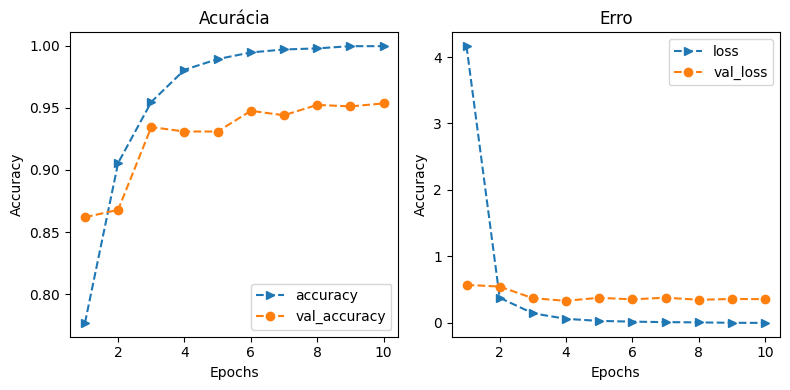

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Gráfico 1 - Acurácia em Treinamento
ax1.plot(range(1, len(history.history['accuracy']) + 1), 
         history.history['accuracy'], 
         '-->', 
         label='accuracy')
ax1.plot(range(1, len(history.history['accuracy']) + 1), 
         history.history['val_accuracy'], 
         '--o', 
         label='val_accuracy')
ax1.set_title('Acurácia')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(loc='lower right')

# Gráfico 2 - Perda em Treinamento
ax2.plot(range(1, len(history.history['loss']) + 1), 
         history.history['loss'], 
         '-->', 
         label='loss')
ax2.plot(range(1, len(history.history['loss']) + 1), 
         history.history['val_loss'], 
         '--o', 
         label='val_loss')
ax2.set_title('Erro')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()